# RSNA Lumbar Spine Challenge
Authors: Abhinav Suri MPH, Andrew Wentland MD PhD, Hari Trivedi MD 
– Radiology Artificial Intelligence Data Standards Committee

### Purpose of this notebook:

This notebook aims to give a brief overview of what data is available in the challenge and how to get started with visualizing some of the conditions in our dataset. 

### Overview of the clinical problem

Degenerative spine conditions adversely affect people’s quality of life. Detecting these conditions is crucial for determining therapeutic plans for patients. Therefore, it is essential to develop methods for detecting and assessing the severity of degenerative spine conditions on imaging.
 
This challenge primarily focuses on identifying three types of conditions in the lumbar region of the spine (refer below for the anatomical overview). The three conditions we aim to assess are:
 
1. Foraminal narrowing (on either the left or right foramen at a specified level).
2. Subarticular stenosis (on either the left or right side at a specified level).
3. Canal stenosis (only at a specified level).
 
Each of these conditions can manifest at various levels within the spine itself, specifically at each vertebral disc (e.g., L4/5 corresponds to the vertebral disc between the L4 and L5 vertebral bodies).


For each of the conditions, you'll need to predict whether the degree of compression is normal/mild, moderate, or severe. You can refer to the example test submission `sample_submission.csv` to get a better idea for what we're looking for in terms of output. For each case, you'll have to output a score from 0 to 1 representing the probability of the patient having a specific grade (`normal_mild`, `moderate`, `severe`), at the spinal level (`l1_l2`, `l2_l3`, `l3_l4`, `l4_l5`, `l5_s1`), for that condition (`spinal_canal_stenosis`, `left_neural_foraminal_narrowing`, `right_neural_foraminal_narrowing`, `left_subarticular_stenosis`, `right_subarticular_stenosis`):


Let's talk a bit about the anatomy to get a sense for what we're asking you all to detect.

### Anatomical Overview

The spine is divided into four regions: the cervical region (with 7 vertebral bodies), the thoracic region (with 12 vertebral bodies), the lumbar region (with 5 vertebral bodies), and the sacral region (with 3-5 fused vertebral bodies). 

<img src="https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg" width=400/>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/53655832/Gray-square.001_big_gallery.jpeg)*

Between each vertebral body in all of the regions (except the sacrum) is a vertebral disc. Furthermore, along the posterior aspect of each vertebral body lies the spinal cord. At each vertebral body, spinal nerves leave the spinal cord through openings between vertebral bodies called foramina.

<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/78/1e/781e78be-8980-466f-8a82-83a5c8350770/herniated_disc_larger.jpg__720.0x600.0_q85_subject_location-360%2C300_subsampling-2.jpg" width=400/>  

*From [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*

Compression of the spinal cord or any of the nerves can cause pain to patients. Things that can cause compression of these nerves/the spinal cord include a bulging vertebral disc, degenerative changes in the bones itself (leading them to grow protrusions/become compressed), trauma, or thickening of the ligaments surrounding the spinal cord.

### Foraminal Narrowing Overview

The spinal cord has spinal nerves that exit the spinal canal through openings called foramina. The foramina are best viewed in the sagittal plane. Sometimes these openings can become compressed, resulting in foraminal narrowing. This compression results in pain for patients along the nerve distribution that is downstream of the compression. 

On the left, the image shows a sagittal MR slice where the foramina are visible. Crosshairs show where the foramina exit the spinal canal. On the right, the image shows our grading criteria for designating the degree of compression (note for this challenge, Normal/Mild is one label).
<p float="middle">
<img src="https://i.imgur.com/6c7erNM.png" width=300/>
<img src="https://i.imgur.com/b1VGiN5.png" width=300/>
</p>

### Subarticular Stenosis Overview

Subarticular stenosis is due to compression of the spinal cord in the subarticular zone (this compression can be best visualized in the axial plane).

On the left is a schematic showing the relevant anatomical zone. On the right is our grading criteria for designating the degree of subarticular stenosis (normal/mild is collapsed into one label for this challenge). 
<p float="middle">
<img src="https://files.miamineurosciencecenter.com/media/filer_public_thumbnails/filer_public/d5/08/d508ae6a-a4f2-4796-be9f-455f8df45fe1/herniation_zones.jpg__1700.0x1308.0_q85_subject_location-850%2C656_subsampling-2.jpg" width=300/>
<img src="https://i.imgur.com/Usuxgge.png" width=300/>
</p>

*Left image from [Miami Neuroscience Center](https://miamineurosciencecenter.com/en/conditions/herniated-disc/)*


### Canal Stenosis Overview

Canal stenosis is impingement on the spinal canal (where the spinal cord travels). Impingement can be due to a bulging vertebral disc, trauma, bony osteophytes (outgrowths of the vertebral bodies due to degenerative changes), or ligamental thickening (of the ligaments that run along the length of the spinal canal). The degree of compression is best assessed in the axial plane.

On the left, we show canal stenosis visible in the sagittal plane (to give an overview of what it looks like). On the right, we show our canal stenosis grading criteria (normal/mild are collapsed into one label). 

<p float="middle">
<img src="https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg" width=300/>
<img src="https://i.imgur.com/opjnAwl.png" width=300/>
</p>

*From [Radiopedia](https://prod-images-static.radiopaedia.org/images/940993/f7a8adca63efae788f621869cc21e8_big_gallery.jpg)*

### Imaging Overview

MRI imaging of the spine can be taken in three planes: the axial plane, the sagittal plane, and the coronal plane. The two main image types you'll need for this challenge are the axial and sagittal planes. The axial plane takes images horizonal slices (perpendicular to the spine) across the body from top to bottom. The sagittal plane takes vertical slices (parallel to the spine) going from left to right. 

MRI images come in multiple variants. They can generally be classified as either being T1 weighted or T2 weighted. T1 weighted images show fat as being brighter. The inner part of bones would appear brighter on T1 images. T2 images show water as brighter. The spinal canal would appear as brighter on T2 images. MRI images are not standardized with regards to the pixel values that are output from it (unlike CT images). So you'll need to figure out how to standardize these images (or maybe you wont need to at all, we'll leave it up to you). 

## Expected Directory Structure
We expect the following to be in your working directory to run this notebook.

```
.
├── /notebooks/
    ├──ExploreData.ipynb **This notebook
└── /data/raw/
    ├── test_images/
    │   ├── 1005139/
    │   │   └── 609308237/
    │   │       ├── 1.dcm
    │   │       └── ...
    │   └── ...
    ├── test_series_descriptions.csv
    ├── train_images/
    │   ├── 4003253/
    │   │   └── 702807833/
    │   │       ├── 1.dcm
    │   │       └── ...
    │   └── ...
    ├── train_label_coordinates.csv
    ├── train_series_descriptions.csv
    └── train.csv
```

## Loading Diagnosis Information

In this part of the notebook, we'll load in information about the diagnoses present in our dataset to give an overview of the distribution of cases.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pydicom
import numpy as np
import os
import glob
from tqdm import tqdm
import warnings

In [13]:
ROOT_DATA_PATH = "../data/raw"
train = pd.read_csv(f"{ROOT_DATA_PATH}/train.csv")

In [11]:
print("Total Cases: ", len(train))

Total Cases:  1975


In [4]:
train.columns

Index(['study_id', 'spinal_canal_stenosis_l1_l2',
       'spinal_canal_stenosis_l2_l3', 'spinal_canal_stenosis_l3_l4',
       'spinal_canal_stenosis_l4_l5', 'spinal_canal_stenosis_l5_s1',
       'left_neural_foraminal_narrowing_l1_l2',
       'left_neural_foraminal_narrowing_l2_l3',
       'left_neural_foraminal_narrowing_l3_l4',
       'left_neural_foraminal_narrowing_l4_l5',
       'left_neural_foraminal_narrowing_l5_s1',
       'right_neural_foraminal_narrowing_l1_l2',
       'right_neural_foraminal_narrowing_l2_l3',
       'right_neural_foraminal_narrowing_l3_l4',
       'right_neural_foraminal_narrowing_l4_l5',
       'right_neural_foraminal_narrowing_l5_s1',
       'left_subarticular_stenosis_l1_l2', 'left_subarticular_stenosis_l2_l3',
       'left_subarticular_stenosis_l3_l4', 'left_subarticular_stenosis_l4_l5',
       'left_subarticular_stenosis_l5_s1', 'right_subarticular_stenosis_l1_l2',
       'right_subarticular_stenosis_l2_l3',
       'right_subarticular_stenosis_l3_l4',
 

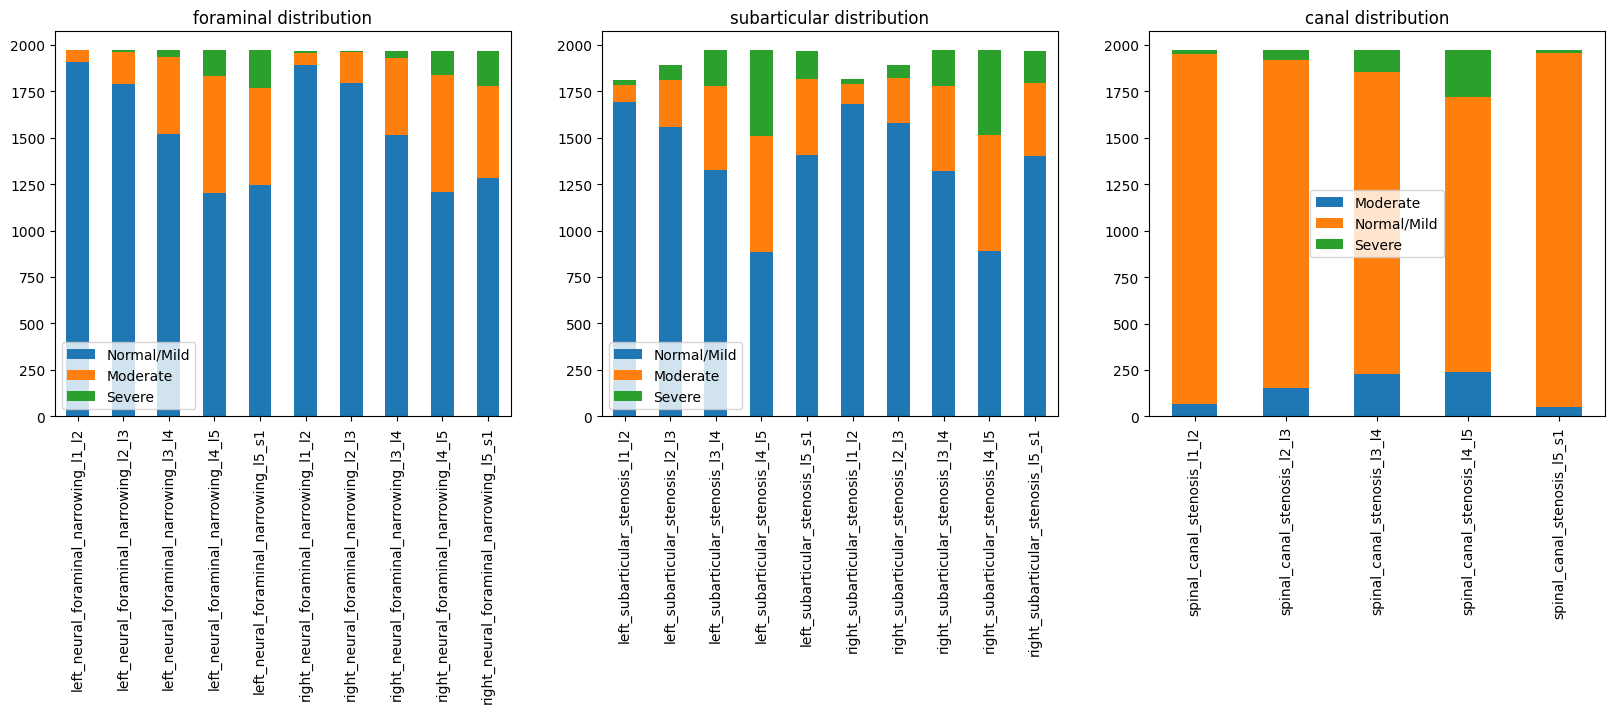

In [5]:
figure, axis = plt.subplots(1,3, figsize=(20,5)) 
for idx, d in enumerate(['foraminal', 'subarticular', 'canal']):
    diagnosis = list(filter(lambda x: x.find(d) > -1, train.columns))
    dff = train[diagnosis]
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)
        value_counts = dff.apply(pd.value_counts).fillna(0).T
    value_counts.plot(kind='bar', stacked=True, ax=axis[idx])
    axis[idx].set_title(f'{d} distribution')

As expected many of our patients have normal/mild grades for each of the diagnoses categories. You'll also see that for some of the diagnoses (particularly subarticular stenosis category), there are missing data. This is due to the fact that some of the images do not have those regions visualized (more specifically the most superior vertebral bodies were less likely to make it into the imaging field).

## Loading in images

Now that we can see the rough distribution of diagnoses, let's go ahead and load in an example set of scans for one patient. We'll start off by grabbing the scan for one patient as an example. 

In terms of background. Each patient has a Study (called a StudyInstanceUID). That study has multiple series called a (SeriesInstanceUID). Within a series you have multiple images with a unique SOPInstanceUID. 

All of this data is tied together via the csv from earlier that listed diagnoses types, but also a separate dicom metadata file that contains information about the particular series descriptions (containing useful series descriptions such as whether the image is sagital or axial and t1 vs t2). Though the names for the series descriptions are not standardized.

### Grab metadata for each scan.
For each scan let's create an object with the following structure:

```
meta_obj = {
    StudyInstanceUID: {
        'folder_path': ... # path to the folder,
        'SeriesInstanceUIDs': [ Array of the SeriesInstanceUIDs ],
        'SeriesDescriptions' [ Array of the Series Descriptions ]
    }, ...
}
```

In [19]:
# List out all of the Studies we have on patients.
part_1 = os.listdir(f"{ROOT_DATA_PATH}/train_images")
part_1 = list(filter(lambda x: x.find('.DS') == -1, part_1))

In [20]:
df_meta_f = pd.read_csv(f"{ROOT_DATA_PATH}/train_series_descriptions.csv")

In [21]:
p1 = [(x, f"{ROOT_DATA_PATH}/train_images/{x}") for x in part_1]
meta_obj = { p[0]: { 'folder_path': p[1], 
                    'SeriesInstanceUIDs': [] 
                   } 
            for p in p1 }

In [22]:
for m in meta_obj:
    meta_obj[m]['SeriesInstanceUIDs'] = list(
        filter(lambda x: x.find('.DS') == -1, 
               os.listdir(meta_obj[m]['folder_path'])
              )
    )

In [23]:
# grabs the correspoding series descriptions
for k in tqdm(meta_obj):
    for s in meta_obj[k]['SeriesInstanceUIDs']:
        if 'SeriesDescriptions' not in meta_obj[k]:
            meta_obj[k]['SeriesDescriptions'] = []
        try:
            meta_obj[k]['SeriesDescriptions'].append(
                df_meta_f[(df_meta_f['study_id'] == int(k)) & 
                (df_meta_f['series_id'] == int(s))]['series_description'].iloc[0])
        except:
            print("Failed on", s, k)

  0%|          | 0/1975 [00:00<?, ?it/s]

100%|██████████| 1975/1975 [00:02<00:00, 706.28it/s]


In [24]:
meta_obj[list(meta_obj.keys())[1]]

{'folder_path': '../data/raw/train_images/1002894806',
 'SeriesInstanceUIDs': ['1252873726', '801316590', '866293114'],
 'SeriesDescriptions': ['Axial T2', 'Sagittal T2/STIR', 'Sagittal T1']}

#### Pull up images for one patient

Now that we've made our meta obj, let's pull up all the images for one patient.

In [25]:
patient = train.iloc[1]

In [26]:
ptobj = meta_obj[str(patient['study_id'])]

In [27]:
print(ptobj)

{'folder_path': '../data/raw/train_images/4646740', 'SeriesInstanceUIDs': ['3201256954', '3486248476', '3666319702'], 'SeriesDescriptions': ['Axial T2', 'Sagittal T1', 'Sagittal T2/STIR']}


In [28]:
# Get data into the format
"""
im_list_dcm = {
    '{SeriesInstanceUID}': {
        'images': [
            {'SOPInstanceUID': ...,
             'dicom': PyDicom object
            },
            ...,
        ],
        'description': # SeriesDescription
    },
    ...
}
"""
im_list_dcm = {}
for idx, i in enumerate(ptobj['SeriesInstanceUIDs']):
    im_list_dcm[i] = {'images': [], 'description': ptobj['SeriesDescriptions'][idx]}
    images = glob.glob(f"{ptobj['folder_path']}/{ptobj['SeriesInstanceUIDs'][idx]}/*.dcm")
    for j in sorted(images, key=lambda x: int(x.split('/')[-1].replace('.dcm', ''))):
        im_list_dcm[i]['images'].append({
            'SOPInstanceUID': j.split('/')[-1].replace('.dcm', ''), 
            'dicom': pydicom.dcmread(j) })

In [29]:
# Function to display images
def display_images(images, title, max_images_per_row=4):
    # Calculate the number of rows needed
    num_images = len(images)
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Ceiling division

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, max_images_per_row, figsize=(5, 1.5 * num_rows))
    
    # Flatten axes array for easier looping if there are multiple rows
    if num_rows > 1:
        axes = axes.flatten()
    else:
        axes = [axes]  # Make it iterable for consistency

    # Plot each image
    for idx, image in enumerate(images):
        ax = axes[idx]
        ax.imshow(image, cmap='gray')  # Assuming grayscale for simplicity, change cmap as needed
        ax.axis('off')  # Hide axes

    # Turn off unused subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')
    fig.suptitle(title, fontsize=16)

    plt.tight_layout()

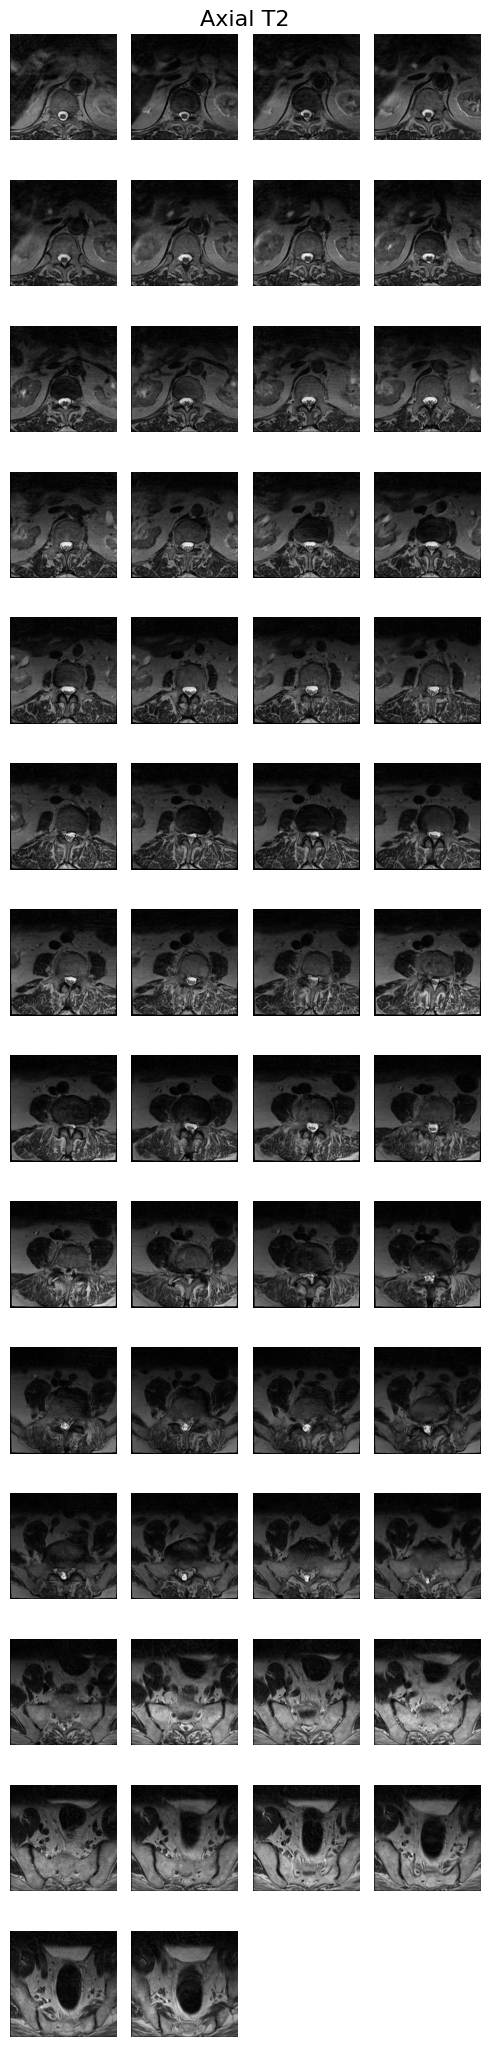

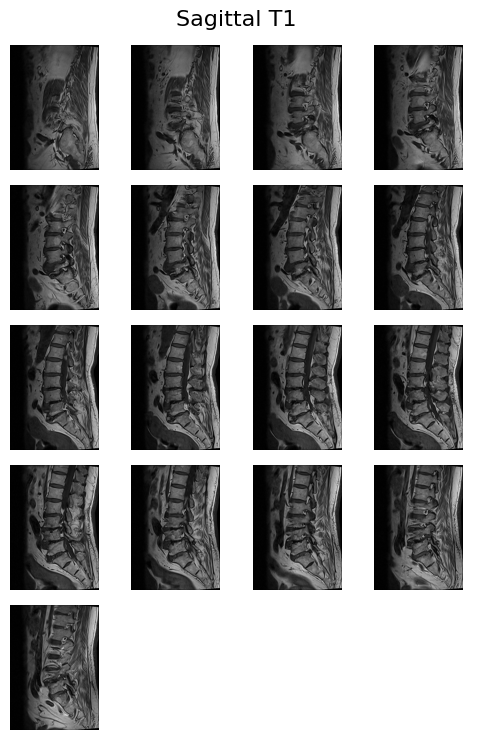

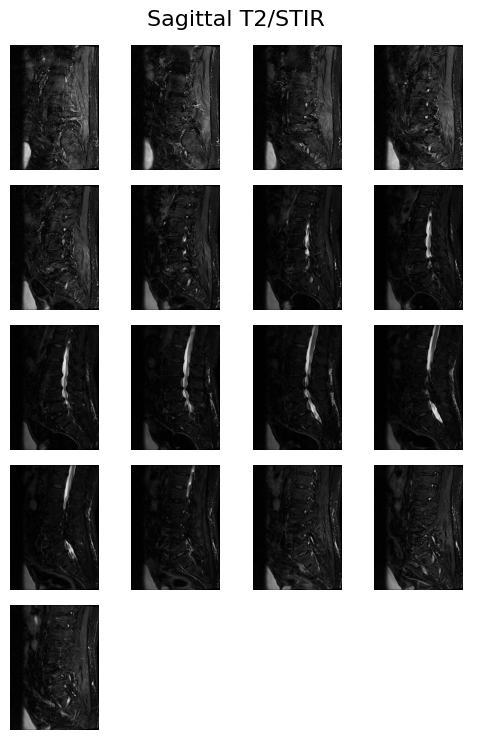

In [30]:
for i in im_list_dcm:
    display_images([x['dicom'].pixel_array for x in im_list_dcm[i]['images']], 
                   im_list_dcm[i]['description'])

### Look at the coordinates of pathologies

We can also display the coordinates of the pathologies that are annotated for each of the patients.

In [33]:
df_coor = pd.read_csv(f"{ROOT_DATA_PATH}/train_label_coordinates.csv")

In [34]:
df_coor.head()

,study_id,series_id,instance_number,condition,level,x,y
0,4003253,702807833,8,Spinal Canal Stenosis,L1/L2,322.831858,227.964602
1,4003253,702807833,8,Spinal Canal Stenosis,L2/L3,320.571429,295.714286
2,4003253,702807833,8,Spinal Canal Stenosis,L3/L4,323.030303,371.818182
3,4003253,702807833,8,Spinal Canal Stenosis,L4/L5,335.292035,427.327434
4,4003253,702807833,8,Spinal Canal Stenosis,L5/S1,353.415929,483.964602


In [35]:
def display_coor_on_img(c, i, title):
    center_coordinates = (int(c['x']), int(c['y']))
    radius = 10
    color = (255, 0, 0)  # Red color in BGR
    thickness = 2
    IMG = i['dicom'].pixel_array
    IMG_normalized = cv2.normalize(IMG, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    IMG_with_circle = cv2.circle(IMG_normalized.copy(), center_coordinates, radius, color, thickness)
    
    # Convert the image from BGR to RGB for correct color display in matplotlib
    IMG_with_circle = cv2.cvtColor(IMG_with_circle, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(IMG_with_circle)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(title)
    plt.show()


In [36]:
coor_entries = df_coor[df_coor['study_id'] == int(patient['study_id'])]

Only showing severe cases for this patient


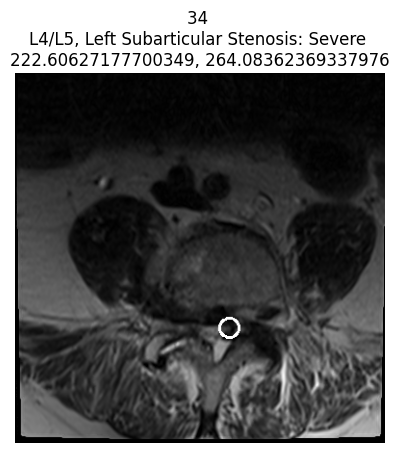

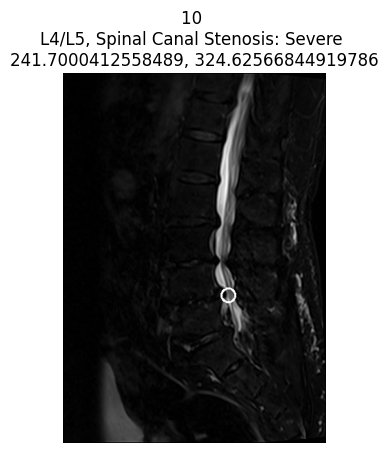

In [37]:
print("Only showing severe cases for this patient")
for idc, c in coor_entries.iterrows():
    for i in im_list_dcm[str(c['series_id'])]['images']:
        if int(i['SOPInstanceUID']) == int(c['instance_number']):
            try:
                patient_severity = patient[
                    f"{c['condition'].lower().replace(' ', '_')}_{c['level'].lower().replace('/', '_')}"
                ]
            except Exception as e:
                patient_severity = "unknown severity"
            title = f"{i['SOPInstanceUID']} \n{c['level']}, {c['condition']}: {patient_severity} \n{c['x']}, {c['y']}"
            if patient_severity == 'Severe':
                display_coor_on_img(c, i, title)

## Wrap up

In this notebook we covered the basic distribution of cases in our popuation, how to look at which scans and diagnoses correspond to each patient, and how to visualize the patient DICOMs + locations of annotated pathologies. Have fun with the challenge!